## Weather Forecast

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import itertools
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,f1_score, accuracy_score, precision_recall_curve,confusion_matrix
from sklearn.model_selection import train_test_split
!pip install category_encoders
from category_encoders import TargetEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 2.2 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
def report_model(model,X_test,y_test):
    model_preds = model.predict(X_test)
    yHat = (model_preds >= 0.5).astype(int)
    print(classification_report(y_test,yHat))

#### Data Preview

In [ ]:
url = 'https://raw.githubusercontent.com/ninjaemperor/Rain_in_Australia/main/weatherAUS.csv'
data = pd.read_csv(url)

In [ ]:
data.Date.value_counts()

2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

In [ ]:
data[data.Date == '2013-11-12']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1718,2013-11-12,Albury,12.1,18.6,4.4,NaN,NaN,W,46.0,SSE,...,75.0,65.0,1015.0,1011.4,8.0,8.0,14.3,17.1,Yes,No
4727,2013-11-12,BadgerysCreek,13.7,22.8,31.0,NaN,NaN,NNE,26.0,S,...,86.0,73.0,1012.7,1010.3,NaN,NaN,17.2,19.4,Yes,Yes
7736,2013-11-12,Cobar,10.0,25.2,0.0,8.4,NaN,WSW,44.0,SW,...,63.0,21.0,1014.2,1012.4,1.0,2.0,15.2,23.4,No,No
10745,2013-11-12,CoffsHarbour,17.9,26.4,59.6,NaN,5.7,NNE,50.0,NNW,...,78.0,65.0,1015.8,1012.5,7.0,8.0,22.0,25.7,Yes,Yes
13754,2013-11-12,Moree,17.5,31.1,NaN,NaN,NaN,W,46.0,N,...,83.0,42.0,1012.6,1010.5,6.0,6.0,20.1,26.3,NaN,NaN
16794,2013-11-12,Newcastle,14.7,21.8,2.8,NaN,NaN,NaN,NaN,NaN,...,82.0,95.0,NaN,NaN,8.0,6.0,19.9,18.5,Yes,Yes
19802,2013-11-12,NorahHead,16.3,21.0,7.0,NaN,NaN,NNE,48.0,WSW,...,91.0,82.0,1012.6,1011.6,NaN,NaN,17.5,19.1,Yes,Yes
22806,2013-11-12,NorfolkIsland,16.1,21.6,0.0,5.8,9.6,E,37.0,E,...,53.0,63.0,1021.7,1020.5,7.0,3.0,19.7,20.7,No,No
25845,2013-11-12,Penrith,14.1,22.9,17.8,NaN,NaN,NNW,30.0,SSE,...,98.0,80.0,NaN,NaN,NaN,NaN,17.5,19.5,Yes,Yes
28854,2013-11-12,Richmond,14.0,24.4,17.2,2.0,NaN,SSE,30.0,SSW,...,91.0,69.0,1013.2,1010.9,NaN,NaN,17.4,20.5,Yes,Yes


In [ ]:
data.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
data_float = data.select_dtypes(exclude = 'object')

### Data Processing

##### drop redundant information

In [ ]:
#seems like information about date is useless, due to the fact we only predict tomorrow condition situation and already has a label
data.drop(columns = ['Date'],inplace = True)

##### Missing value 

In [ ]:
# create dummy variable for each missing value
data_is_missing = pd.DataFrame({'column':data.isna().any().index, 'if_missing':data.isna().any().values})
data_is_missing = data_is_missing.set_index('column')
data_is_missing

,if_missing
column,
Location,False
MinTemp,True
MaxTemp,True
Rainfall,True
Evaporation,True
Sunshine,True
WindGustDir,True
WindGustSpeed,True
WindDir9am,True


In [ ]:
odds_df = pd.DataFrame(columns = ['column','odds_if_missing','odds_not_missing','diff','missing_percentage'])
for i in data_is_missing[data_is_missing['if_missing'] == True].index.values:
    result_m = data.RainTomorrow[data[i].isna()].value_counts()
    result_n = data.RainTomorrow[~data[i].isna()].value_counts()
    if len(result_m) == 2 and len(result_n) == 2:
        odds_m = result_m[1]/result_m[0]
        odds_n = result_n[1]/result_n[0]
        diff = odds_m / odds_n
    else:
        odds_m = 'alert'
        odds_n = 'alert'
        diff = 'alert'
    missing_p = data[i].isna().sum()/len(data)
    odds_df = odds_df.append({'column':i,'odds_if_missing':odds_m,'odds_not_missing':odds_n,'diff':diff,'missing_percentage':missing_p},ignore_index = True)

In [ ]:
odds_df

,column,odds_if_missing,odds_not_missing,diff,missing_percentage
0,MinTemp,0.378788,0.288583,1.312579,0.010209
1,MaxTemp,0.205993,0.289162,0.712377,0.008669
2,Rainfall,0.926027,0.284717,3.252448,0.022419
3,Evaporation,0.29937,0.281284,1.064298,0.431665
4,Sunshine,0.285368,0.292254,0.976436,0.480098
5,WindGustDir,0.359464,0.284284,1.264455,0.070989
6,WindGustSpeed,0.357645,0.284429,1.257413,0.070555
7,WindDir9am,0.237395,0.293043,0.810104,0.072639
8,WindDir3pm,0.386422,0.286492,1.348804,0.029066
9,WindSpeed9am,0.337302,0.288515,1.169095,0.012148


In [ ]:
# from this data, we can see that for some value, missing or not will have significant influence on the prediction of rain tomorrow, thus we would like to create dummy variable

In [ ]:
missing_value_list = []
column_list = []
for i in data_is_missing.index:
    if data_is_missing.loc[i,'if_missing'] == True:
        prep = ['is','na']
        prep.append(i)
        txt = '_'.join(prep)
        missing_value_list.append(txt)
        column_list.append(i)

In [ ]:
print(missing_value_list)
print(column_list)

['is_na_MinTemp', 'is_na_MaxTemp', 'is_na_Rainfall', 'is_na_Evaporation', 'is_na_Sunshine', 'is_na_WindGustDir', 'is_na_WindGustSpeed', 'is_na_WindDir9am', 'is_na_WindDir3pm', 'is_na_WindSpeed9am', 'is_na_WindSpeed3pm', 'is_na_Humidity9am', 'is_na_Humidity3pm', 'is_na_Pressure9am', 'is_na_Pressure3pm', 'is_na_Cloud9am', 'is_na_Cloud3pm', 'is_na_Temp9am', 'is_na_Temp3pm', 'is_na_RainToday', 'is_na_RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [ ]:
# create dummy variables for columns that contains missing value
data_isna = data.isna()[column_list] * 1
data_isna.columns = missing_value_list
display(data_isna)

,is_na_MinTemp,is_na_MaxTemp,is_na_Rainfall,is_na_Evaporation,is_na_Sunshine,is_na_WindGustDir,is_na_WindGustSpeed,is_na_WindDir9am,is_na_WindDir3pm,is_na_WindSpeed9am,...,is_na_Humidity9am,is_na_Humidity3pm,is_na_Pressure9am,is_na_Pressure3pm,is_na_Cloud9am,is_na_Cloud3pm,is_na_Temp9am,is_na_Temp3pm,is_na_RainToday,is_na_RainTomorrow
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
145456,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
145457,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
145458,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0     56420
4     28675
2     18346
1     10909
6     10229
3      9782
5      4141
7      2277
8      1072
12      781
11      719
13      617
9       492
10      328
21      182
17      107
19       96
15       82
14       75
16       59
18       56
20       15
dtype: int64


(array([6.7329e+04, 1.8346e+04, 9.7820e+03, 2.8675e+04, 4.1410e+03,
        1.0229e+04, 2.2770e+03, 1.0720e+03, 4.9200e+02, 3.2800e+02,
        7.1900e+02, 7.8100e+02, 6.1700e+02, 7.5000e+01, 8.2000e+01,
        5.9000e+01, 1.0700e+02, 5.6000e+01, 9.6000e+01, 1.9700e+02]),
 array([ 0.  ,  1.05,  2.1 ,  3.15,  4.2 ,  5.25,  6.3 ,  7.35,  8.4 ,
         9.45, 10.5 , 11.55, 12.6 , 13.65, 14.7 , 15.75, 16.8 , 17.85,
        18.9 , 19.95, 21.  ]),
 <a list of 20 Patch objects>)

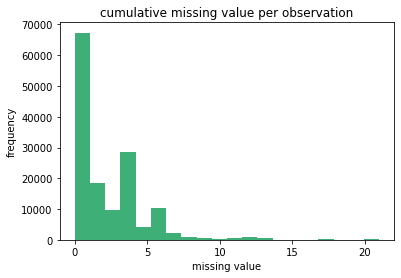

In [ ]:
# plot the distribution of missing value per observation
num_missing = data_isna.sum(axis = 1)
print(num_missing.value_counts())
plt.title('cumulative missing value per observation')
plt.xlabel('missing value')
plt.ylabel('frequency')
plt.hist(num_missing,bins = 20,color = '#3eaf76'  )

In [ ]:
# based on result, we found many observation has 4 missing value, so we look at detail data
data_isna.iloc[(num_missing[num_missing == 4]).index,:].loc[:,['is_na_Evaporation','is_na_Sunshine','is_na_Cloud9am','is_na_Cloud3pm']]

,is_na_Evaporation,is_na_Sunshine,is_na_Cloud9am,is_na_Cloud3pm
1,1,1,1,1
3,1,1,1,1
5,1,1,1,1
7,1,1,1,1
8,1,1,1,1
...,...,...,...,...
145453,1,1,1,1
145454,1,1,1,1
145455,1,1,1,1
145456,1,1,1,1


When exploring the missing value, we found the following phenomenon:
1. 40% of evaporation, sunshine, cloud9am, cloud3pm are missing
2. above four feature tend to missing at the same time
3. for evaporation, missing or not, the chance of getting rain tomorrow is approximate the same. but for Rainfall,RainToday, if missing, the chance of getting rain tomorrow is twice as likely compare to not missing.

In [ ]:
data_combine = pd.concat([data,data_isna],axis = 1)

In [ ]:
data_combine

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,is_na_Humidity9am,is_na_Humidity3pm,is_na_Pressure9am,is_na_Pressure3pm,is_na_Cloud9am,is_na_Cloud3pm,is_na_Temp9am,is_na_Temp3pm,is_na_RainToday,is_na_RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,0,0,0,0,0,1,0,0,0,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,0,0,0,0,1,1,0,0,0,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,0,0,0,0,1,0,0,0,0,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,0,0,0,0,1,1,0,0,0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,0,0,0,0,1,1,0,0,0,0
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,0,0,0,0,1,1,0,0,0,0
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,0,0,0,0,1,1,0,0,0,0
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# sunshine seems like has differnet problem

### Baseline model - just drop missing value

In [ ]:
data_base = data.copy()
data_base.drop(columns = ['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis = 1,inplace = True)
data_base.dropna(inplace = True)

In [ ]:
data_base.isna().any()

Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [ ]:
data_base['RainTomorrow'] = data_base['RainTomorrow'].map({'No':0,'Yes':1})
data_base['RainToday'] = data_base['RainToday'].map({'No':0,'Yes':1})

In [ ]:
data_base.RainTomorrow.value_counts()

0    87906
1    25019
Name: RainTomorrow, dtype: int64

In [ ]:
from matplotlib import cm
cmap = cm.get_cmap('rainbow')

0.2215541288465796

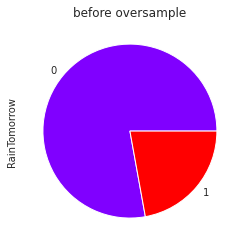

In [ ]:
# data distribution before resample
data_base['RainTomorrow'].value_counts().plot(kind = 'pie',title = 'before oversample',cmap = cmap)
len(data_base[data_base['RainTomorrow'] == 1])/len(data_base)

In [ ]:
# data split and rebalance of training set
X = data_base.drop(columns = ['RainTomorrow'])
y = data_base[['RainTomorrow']]
# split data set into train and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 2,stratify = y)
# further split train set into train and validation set
train_x,val_x,train_y,val_y = train_test_split(x_train,y_train,test_size = 0.3,random_state = 3,stratify = y_train)

In [ ]:
# rebalance the train set
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 2)
x_resample,y_resample = ros.fit_resample(x_train,y_train)
# rebalance the new subtrain set
resample_x,resample_y = ros.fit_resample(train_x,train_y)

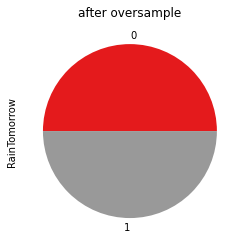

In [ ]:
# data distribution after resample
df_resample = pd.DataFrame(y_resample)
df_resample['RainTomorrow'].value_counts().plot(kind = 'pie',title = 'after oversample',cmap = cmap)

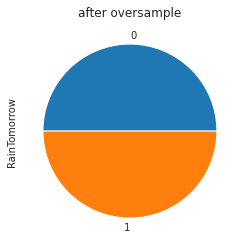

In [ ]:
# data distribution after resample
df_resample = pd.DataFrame(resample_y)
df_resample['RainTomorrow'].value_counts().plot(kind = 'pie',title = 'after oversample')

##### Target encoding

In [ ]:
data_category = data_base.select_dtypes(include = 'object')
data_category

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW
...,...,...,...,...
145454,Uluru,E,ESE,E
145455,Uluru,E,SE,ENE
145456,Uluru,NNW,SE,N
145457,Uluru,N,SE,WNW


In [ ]:
x_resample[data_category.columns]

,Location,WindGustDir,WindDir9am,WindDir3pm
0,SydneyAirport,SSW,NW,S
1,Melbourne,WSW,W,NW
2,GoldCoast,WNW,WNW,WNW
3,Williamtown,NE,NE,ENE
4,Darwin,ESE,SE,NW
...,...,...,...,...
123063,PearceRAAF,W,N,WNW
123064,Cobar,SW,SSE,SSW
123065,Hobart,NW,NW,WNW
123066,Darwin,WSW,NNW,WSW


In [ ]:
# target encoding train and test set
enc = TargetEncoder(cols = data_category.columns.tolist())
train_numeric = enc.fit_transform(x_resample,y_resample,smoothing = 10) # smoothing is the weights that will assign to overall mean to prevent overfitting and informamtion leakarage
test_numeric = enc.transform(x_test,y_test)

In [ ]:
train_numeric[data_category.columns]

,Location,WindGustDir,WindDir9am,WindDir3pm
0,0.546129,0.499750,0.569391,0.486468
1,0.529061,0.519337,0.551711,0.588699
2,0.539158,0.593974,0.553752,0.588492
3,0.527373,0.431202,0.480747,0.434718
4,0.573340,0.409828,0.384605,0.588699
...,...,...,...,...
123063,0.396979,0.567045,0.613341,0.588492
123064,0.338334,0.470953,0.434275,0.492618
123065,0.516979,0.580370,0.569391,0.588492
123066,0.573340,0.519337,0.601238,0.496162


In [ ]:
# target encoding new train and validation set
enc = TargetEncoder(cols = data_category.columns.tolist())
numeric_train = enc.fit_transform(resample_x,resample_y,smoothing = 10) # smoothing is the weights that will assign to overall mean to prevent overfitting and informamtion leakarage
numeric_val = enc.transform(val_x)

In [ ]:
numeric_train

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.518144,10.3,16.9,3.2,0.504986,31.0,0.498377,0.442676,13.0,15.0,76.0,65.0,1023.5,1022.4,13.0,16.3,1
1,0.449698,5.6,20.0,0.0,0.461785,17.0,0.464553,0.558714,6.0,4.0,83.0,42.0,1019.6,1016.3,11.0,19.4,0
2,0.546766,7.4,29.3,0.2,0.595901,31.0,0.422796,0.575712,7.0,17.0,79.0,30.0,1015.5,1011.3,16.7,28.1,0
3,0.567819,20.9,26.2,0.0,0.391724,46.0,0.382251,0.439009,19.0,15.0,62.0,51.0,1021.8,1021.5,22.7,25.4,0
4,0.652194,9.3,29.4,0.0,0.567634,48.0,0.572693,0.575712,13.0,24.0,53.0,24.0,1017.4,1013.4,19.8,27.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86141,0.677346,8.2,15.6,2.8,0.595901,52.0,0.616515,0.586672,20.0,24.0,88.0,64.0,1013.7,1011.2,9.0,15.6,1
86142,0.462567,7.6,18.4,7.8,0.518353,35.0,0.464553,0.586514,9.0,15.0,91.0,58.0,1021.2,1018.1,11.4,17.0,1
86143,0.597217,17.7,21.8,0.4,0.567634,43.0,0.616515,0.575712,20.0,20.0,80.0,74.0,1020.0,1016.7,19.5,21.2,0
86144,0.308824,20.6,27.1,22.0,0.515588,57.0,0.422796,0.439009,17.0,33.0,96.0,96.0,1002.2,997.1,23.9,24.9,1


##### normalize train data and test data

In [ ]:
# normalize train and test set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1,1))
train_numeric_n = scaler.fit_transform(train_numeric)
test_numeric_n = scaler.transform(test_numeric)

In [ ]:
# normalize new train and validation set
scaler = MinMaxScaler(feature_range = (-1,1))
x_train = scaler.fit_transform(numeric_train)
x_val = scaler.transform(numeric_val)

#### Modeling
https://cenleiding.github.io/%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9CANN.html

In [ ]:
# structure of neural network
# initiation: 
# activition function: ReLu, or leaky ReLu
# gradient descent: stochastic gradient descent with momentum
# output function: sigmoid function
# with drop out
# with batch normalization

###### structure

rule of thumb:
1. between size of input layer and size of output layer <br>
2. 2/3 size of input layer, plus the size of output layer <br>
3. <2x the size of input layer <br>
4. theta < m/10

##### initiation

1. Xavier initiaion - work fine with tanh,but may lead to relu die out
2. He initialization - work fine with relu

##### activation function
1. ReLu
 f(x) = (x >0)*x
2. ERelu
 f(x) =  x, if x >= 0; a(e^x - 1), if x < 0


##### Gradiient Descent
1. SGDM (Batch gradient descent with momentum) 
2. RMSProp
3. Adam

##### Drop out
1. randomly delete some neurons

##### Batch normalization
1. let data in hidden layer remain same range,make learning simplier
2. we still need to normalize our data to (-1,1) even if we use batch normalization
see link below
https://stats.stackexchange.com/questions/249378/is-scaling-data-0-1-necessary-when-batch-normalization-is-used#:~:text=To%20answer%20your%20question%3A%20Yes,network%20that%20uses%20Batch%20Normalization.

##### Model training

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
from keras import models

In [ ]:
model = models.Sequential()

model.add(Dropout(0.2,input_shape = (17, )))
# 1st hidden layer
model.add(Dense(units = 17, kernel_initializer = 'HeUniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# 2nd hidden layer
model.add(Dropout(0.25))
model.add(Dense(units = 17, kernel_initializer = 'HeUniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# 3nd hidden layer

model.add(Dense(units = 17, kernel_initializer = 'HeUniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# output layer
model.add(Dropout(0.25))
model.add(Dense(units = 1, kernel_initializer = 'HeUniform'))
model.add(Activation('sigmoid'))

# optimal method
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['AUC','accuracy'])

history = model.fit(x_train,
                    resample_y,
                    epochs=200,
                    batch_size=500,
                    validation_data=(x_val, val_y), 
                    #callbacks=[callback],
                    verbose=1)

Epoch 1/200
173/173 [==============================] - 4s 7ms/step - loss: 0.6443 - auc: 0.6797 - accuracy: 0.6265 - val_loss: 0.5235 - val_auc: 0.8198 - val_accuracy: 0.7714
Epoch 2/200
173/173 [==============================] - 1s 4ms/step - loss: 0.5638 - auc: 0.7818 - accuracy: 0.7149 - val_loss: 0.5200 - val_auc: 0.8459 - val_accuracy: 0.7580
Epoch 3/200
173/173 [==============================] - 1s 4ms/step - loss: 0.5420 - auc: 0.8019 - accuracy: 0.7315 - val_loss: 0.5183 - val_auc: 0.8510 - val_accuracy: 0.7554
Epoch 4/200
173/173 [==============================] - 1s 4ms/step - loss: 0.5333 - auc: 0.8093 - accuracy: 0.7383 - val_loss: 0.5024 - val_auc: 0.8534 - val_accuracy: 0.7632
Epoch 5/200
173/173 [==============================] - 1s 4ms/step - loss: 0.5288 - auc: 0.8135 - accuracy: 0.7417 - val_loss: 0.4985 - val_auc: 0.8556 - val_accuracy: 0.7644
Epoch 6/200
173/173 [==============================] - 1s 4ms/step - loss: 0.5257 - auc: 0.8158 - accuracy: 0.7429 - val_loss

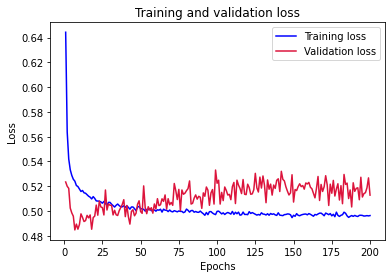

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
auc = history_dict['auc']
val_auc = history_dict['val_auc']


epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, label='Training loss',c = '#0000FF')

plt.plot(epochs, val_loss, label='Validation loss',c = '#DC143C')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

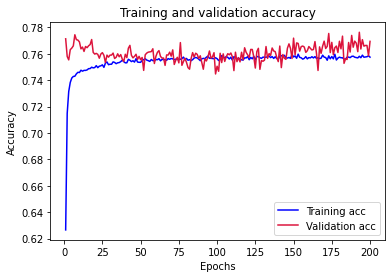

In [ ]:
plt.clf()

plt.plot(epochs, acc, label='Training acc',c = '#0000FF')
plt.plot(epochs, val_acc, label='Validation acc',c = '#DC143C')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 17)                0         
                                                                 
 dense (Dense)               (None, 17)                306       
                                                                 
 batch_normalization (BatchN  (None, 17)               68        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 17)                0         
                                                                 
 dropout_1 (Dropout)         (None, 17)                0         
                                                                 
 dense_1 (Dense)             (None, 17)                306       
                                                        

In [ ]:
print(model.evaluate(test_numeric_n, y_test))

1059/1059 [==============================] - 2s 2ms/step - loss: 0.5148 - auc: 0.8648 - accuracy: 0.7682
[0.5148285031318665, 0.8647781014442444, 0.7681681513786316]


In [ ]:
# function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

       0     1
0  19972  6400
1   1454  6052
[[0.75731837 0.24268163]
 [0.1937117  0.8062883 ]]


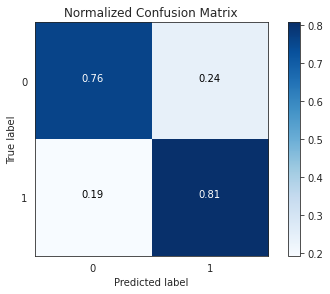

In [ ]:
y_predict = model.predict(test_numeric_n)
yHat = (y_predict >= 0.5).astype(int)
print(pd.DataFrame(confusion_matrix(y_test,yHat)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test, yHat),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score

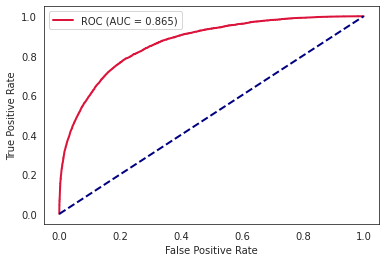

AUC = 0.865


In [ ]:
auc = roc_auc_score(y_test, y_predict)

fpr, tpr, _ = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, color='#DC143C', lw=2, label='ROC (AUC = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('AUC = %.3f' % (auc))

### Improve Model - impune data with mean, and add dummy variable for missing or not

In [ ]:
data_combine = pd.concat([data,data_isna],axis = 1)
data_combine

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,is_na_Humidity9am,is_na_Humidity3pm,is_na_Pressure9am,is_na_Pressure3pm,is_na_Cloud9am,is_na_Cloud3pm,is_na_Temp9am,is_na_Temp3pm,is_na_RainToday,is_na_RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,0,0,0,0,0,1,0,0,0,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,0,0,0,0,1,1,0,0,0,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,0,0,0,0,1,0,0,0,0,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,0,0,0,0,1,1,0,0,0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,0,0,0,0,1,1,0,0,0,0
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,0,0,0,0,1,1,0,0,0,0
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,0,0,0,0,1,1,0,0,0,0
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop redundant information
data_combine.drop(columns = ['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis = 1,inplace = True)
data_combine

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,is_na_Humidity9am,is_na_Humidity3pm,is_na_Pressure9am,is_na_Pressure3pm,is_na_Cloud9am,is_na_Cloud3pm,is_na_Temp9am,is_na_Temp3pm,is_na_RainToday,is_na_RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,0,0,0,0,0,1,0,0,0,0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,0,0,0,0,1,1,0,0,0,0
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,0,0,0,0,1,0,0,0,0,0
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,0,0,0,0,1,1,0,0,0,0
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,...,0,0,0,0,1,1,0,0,0,0
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,...,0,0,0,0,1,1,0,0,0,0
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,...,0,0,0,0,1,1,0,0,0,0
145458,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# we use mean to fill na
data_combine['Rainfall'].value_counts()

0.0      91080
0.2       8761
0.4       3782
0.6       2592
0.8       2056
         ...  
134.8        1
84.4         1
157.6        1
166.8        1
69.0         1
Name: Rainfall, Length: 681, dtype: int64

In [ ]:
# we use mode to fill na
data_combine['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [ ]:
# data imputation
from scipy import stats
data_combine['Rainfall'] = data_combine['Rainfall'].fillna(np.mean(data_combine['Rainfall']))


In [ ]:
data_3 = data.copy()
data_3.dropna(inplace = True)
data_3['RainToday'] = data_3['RainToday'].map({'No':0,'Yes':1})
data_3['RainToday'] = data_3['RainToday'].fillna(stats.mode(data_3['Rainfall'])[0][0])
data_3['RainTomorrow'] = data_3['RainTomorrow'].map({'No':0,'Yes':1})


In [ ]:
data_combine['RainToday'] = data_combine['RainToday'].map({'No':0,'Yes':1})
data_combine['RainToday'] = data_combine['RainToday'].fillna(stats.mode(data_combine['Rainfall'])[0][0])

In [ ]:
data_combine['RainToday'].value_counts()

0.0    113580
1.0     31880
Name: RainToday, dtype: int64

In [ ]:
data_combine['RainTomorrow'] = data_combine['RainTomorrow'].map({'No':0,'Yes':1})

In [ ]:
data_combine['RainTomorrow'].value_counts()

0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64

In [ ]:
data_combine.dropna(inplace = True)

In [ ]:
data_combine

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,is_na_Humidity9am,is_na_Humidity3pm,is_na_Pressure9am,is_na_Pressure3pm,is_na_Cloud9am,is_na_Cloud3pm,is_na_Temp9am,is_na_Temp3pm,is_na_RainToday,is_na_RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,0,0,0,0,0,1,0,0,0,0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,0,0,0,0,1,1,0,0,0,0
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,0,0,0,0,1,0,0,0,0,0
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,0,0,0,0,1,1,0,0,0,0
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,...,0,0,0,0,1,1,0,0,0,0
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,...,0,0,0,0,1,1,0,0,0,0
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,...,0,0,0,0,1,1,0,0,0,0
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
# data split and rebalance of training set
X = data_combine.drop(columns = ['RainTomorrow'])
y = data_combine[['RainTomorrow']]
# split data set into train and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 2,stratify = y)
# further split train set into train and validation set
train_x,val_x,train_y,val_y = train_test_split(x_train,y_train,test_size = 0.3,random_state = 3,stratify = y_train)
# rebalance the train set
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 2)
x_resample,y_resample = ros.fit_resample(x_train,y_train)
# rebalance the new subtrain set
resample_x,resample_y = ros.fit_resample(train_x,train_y)

In [ ]:
data_category = data_base.select_dtypes(include = 'object')
# target encoding train and test set
enc = TargetEncoder(cols = data_category.columns.tolist())
train_numeric = enc.fit_transform(x_resample,y_resample,smoothing = 10) # smoothing is the weights that will assign to overall mean to prevent overfitting and informamtion leakarage
test_numeric = enc.transform(x_test,y_test)
# target encoding new train and validation set
enc = TargetEncoder(cols = data_category.columns.tolist())
numeric_train = enc.fit_transform(resample_x,resample_y,smoothing = 10) # smoothing is the weights that will assign to overall mean to prevent overfitting and informamtion leakarage
numeric_val = enc.transform(val_x)

# normalize train and test set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1,1))
train_numeric_n = scaler.fit_transform(train_numeric)
test_numeric_n = scaler.transform(test_numeric)

# normalize new train and validation set
scaler = MinMaxScaler(feature_range = (-1,1))
x_train = scaler.fit_transform(numeric_train)
x_val = scaler.transform(numeric_val)

In [ ]:
model = models.Sequential()

model.add(Dropout(0.2,input_shape = (38, )))
# 1st hidden layer
model.add(Dense(units = 38, kernel_initializer = 'HeUniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# 2nd hidden layer
model.add(Dropout(0.5))
model.add(Dense(units = 23, kernel_initializer = 'HeUniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# 3nd hidden layer
model.add(Dropout(0.5))
model.add(Dense(units = 23, kernel_initializer = 'HeUniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))


# output layer
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'HeUniform'))
model.add(Activation('sigmoid'))

# optimal method
#sgd = SGD(lr = 0.1,momentum = 0.9,decay = 0.0, nesterov = True)
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['AUC','accuracy'])

history = model.fit(x_train,
                    resample_y,
                    epochs=100,
                    batch_size=600,
                    validation_data=(x_val, val_y), 
                    #callbacks=[callback],
                    verbose=1)

Epoch 1/100
145/145 [==============================] - 4s 10ms/step - loss: 0.7819 - auc: 0.5396 - accuracy: 0.5282 - val_loss: 0.6559 - val_auc: 0.7707 - val_accuracy: 0.6723
Epoch 2/100
145/145 [==============================] - 1s 8ms/step - loss: 0.6761 - auc: 0.6292 - accuracy: 0.5894 - val_loss: 0.5805 - val_auc: 0.8158 - val_accuracy: 0.7724
Epoch 3/100
145/145 [==============================] - 1s 8ms/step - loss: 0.6249 - auc: 0.7088 - accuracy: 0.6520 - val_loss: 0.5249 - val_auc: 0.8324 - val_accuracy: 0.7857
Epoch 4/100
145/145 [==============================] - 1s 7ms/step - loss: 0.5947 - auc: 0.7513 - accuracy: 0.6918 - val_loss: 0.4894 - val_auc: 0.8408 - val_accuracy: 0.7927
Epoch 5/100
145/145 [==============================] - 1s 8ms/step - loss: 0.5743 - auc: 0.7751 - accuracy: 0.7110 - val_loss: 0.4859 - val_auc: 0.8467 - val_accuracy: 0.7816
Epoch 6/100
145/145 [==============================] - 1s 7ms/step - loss: 0.5635 - auc: 0.7870 - accuracy: 0.7240 - val_los

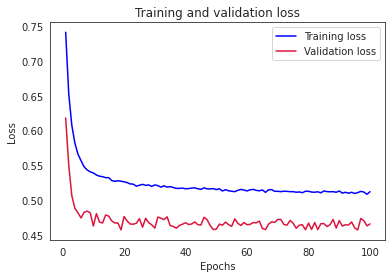

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
auc = history_dict['auc']
val_auc = history_dict['val_auc']


epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, label='Training loss',c = '#0000FF')

plt.plot(epochs, val_loss, label='Validation loss',c = '#DC143C')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

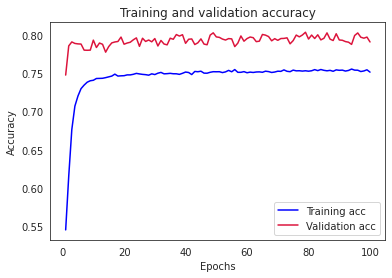

In [ ]:
plt.clf()

plt.plot(epochs, acc, label='Training acc',c = '#0000FF')
plt.plot(epochs, val_acc, label='Validation acc',c = '#DC143C')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 38)                0         
                                                                 
 dense_4 (Dense)             (None, 38)                1482      
                                                                 
 batch_normalization_3 (Batc  (None, 38)               152       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 38)                0         
                                                                 
 dropout_5 (Dropout)         (None, 38)                0         
                                                                 
 dense_5 (Dense)             (None, 25)                975       
                                                      

In [ ]:
print(model.evaluate(test_numeric_n, y_test))

1067/1067 [==============================] - 2s 2ms/step - loss: 0.4707 - auc: 0.8637 - accuracy: 0.7880
[0.4707106053829193, 0.8636565804481506, 0.7880430221557617]


       0     1
0  21012  5475
1   1761  5891
[[0.79329482 0.20670518]
 [0.23013591 0.76986409]]


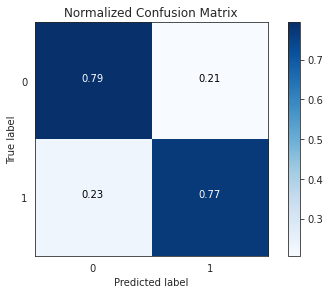

In [ ]:
y_predict = model.predict(test_numeric_n)
yHat = (y_predict >= 0.5).astype(int)
print(pd.DataFrame(confusion_matrix(y_test,yHat)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test, yHat),
                      classes= class_names, 
                      normalize = True, 
                      title='Normalized Confusion Matrix'
                      )

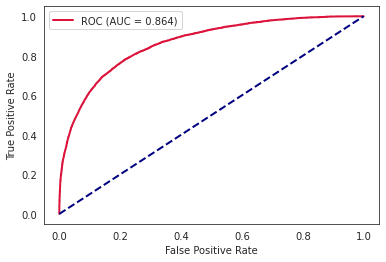

AUC = 0.864


In [ ]:
auc = roc_auc_score(y_test, y_predict)

fpr, tpr, _ = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, color='#DC143C', lw=2, label='ROC (AUC = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('AUC = %.3f' % (auc))

In [ ]:
report_model(model,test_numeric_n,y_test)

              precision    recall  f1-score   support

         0.0       0.92      0.79      0.85     26487
         1.0       0.52      0.77      0.62      7652

    accuracy                           0.79     34139
   macro avg       0.72      0.78      0.74     34139
weighted avg       0.83      0.79      0.80     34139



In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_test,  yHat)

0.6195183510358607

In [ ]:
from sklearn.metrics import roc_auc_score,f1_score, accuracy_score, precision_recall_curve,confusion_matrix, precision_score, recall_score

conf = confusion_matrix(y_test, yHat)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test,yHat)*100, "%")
print()
print("F1 score for logistic regression is :",f1_score(y_test,yHat)*100, "%")
print()
print("Precision score for logistic regression is :",precision_score(y_test,yHat)*100, "%")
print()
print("Recall score for logistic regression is :", recall_score(y_test,yHat)*100, "%")

The accuracy of Logistic Regression is :  78.80430006737163 %

F1 score for logistic regression is : 61.95183510358607 %

Precision score for logistic regression is : 51.83001935597395 %

Recall score for logistic regression is : 76.98640878201776 %
